In [23]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import math

In [45]:
ec_df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\ELECCAP_20211206-014207.csv")
capacity = 'Installed electricity capacity by country/area (MW)'

In [46]:
ec_df.replace("..", np.nan, inplace=True)

In [48]:
ec_df.dropna(inplace=True)
#ec_df.reset_index(inplace=True)
ec_df.head(25)

,index,Country/area,Technology,Grid connection,Year,Installed electricity capacity by country/area (MW)
0,21,Canada,On-grid Solar photovoltaic,On-grid,2000,7
1,22,Canada,On-grid Solar photovoltaic,On-grid,2001,9
2,23,Canada,On-grid Solar photovoltaic,On-grid,2002,10
3,24,Canada,On-grid Solar photovoltaic,On-grid,2003,12
4,25,Canada,On-grid Solar photovoltaic,On-grid,2004,14
5,26,Canada,On-grid Solar photovoltaic,On-grid,2005,18
6,27,Canada,On-grid Solar photovoltaic,On-grid,2006,22
7,28,Canada,On-grid Solar photovoltaic,On-grid,2007,29
8,29,Canada,On-grid Solar photovoltaic,On-grid,2008,38
9,30,Canada,On-grid Solar photovoltaic,On-grid,2009,107


In [33]:
def getUniqueValues(list):
    vals = set()
    for l in list:
        vals.add(l)
    return vals

In [56]:
tech_col = getUniqueValues(ec_df['Technology'].tolist())
print(tech_col)

{'Nuclear', 'Renewable hydropower', 'Liquid biofuels', 'Coal and peat', 'Fossil fuels n.e.s.', 'Pumped storage', 'On-grid Solar photovoltaic', 'Renewable municipal waste', 'Natural gas', 'Biogas', 'Fossil fuels', 'Other non-renewable energy', 'Oil', 'Onshore wind energy', 'Solid biofuels', 'Marine energy'}


In [57]:
grid_conn_col = getUniqueValues(ec_df['Grid connection'].tolist())
print(grid_conn_col)

{'On-grid'}


In [58]:
capacity_dict = {}

for t in tech_col:
    year_dict = {}
    for i in range(len(ec_df)):
        tech = ec_df.loc[i, 'Technology']
        year = int(ec_df.loc[i, 'Year'])
        cap = float(ec_df.loc[i, capacity])
        
        if tech == t:
            year_dict[year] = cap
            
    capacity_dict[t] = year_dict

In [61]:
print(capacity_dict)

{'Nuclear': {2000: 10615.0, 2001: 10615.0, 2002: 10615.0, 2003: 10615.0, 2004: 12805.0, 2005: 13345.0, 2006: 13345.0, 2007: 13345.0, 2008: 13345.0, 2009: 12665.0, 2010: 12665.0, 2011: 12665.0, 2012: 13370.0, 2013: 14033.0, 2014: 14033.0, 2015: 14033.0, 2016: 14033.0, 2017: 14033.0, 2018: 14033.0, 2019: 14033.0, 2020: 14033.0}, 'Renewable hydropower': {2000: 67230.0, 2001: 66882.0, 2002: 69029.0, 2003: 70197.0, 2004: 70680.0, 2005: 71801.0, 2006: 72661.0, 2007: 73281.0, 2008: 74230.0, 2009: 74510.0, 2010: 74901.0, 2011: 75396.0, 2012: 75363.0, 2013: 75337.0, 2014: 75300.0, 2015: 79231.0, 2016: 80130.0, 2017: 80657.0, 2018: 81222.0, 2019: 81222.0, 2020: 81227.0}, 'Liquid biofuels': {2017: 0.0, 2018: 0.0, 2019: 0.0, 2020: 0.0}, 'Coal and peat': {2005: 14703.0, 2006: 14701.0, 2007: 16179.0, 2008: 15940.0, 2009: 16000.0, 2010: 14123.0, 2011: 13849.0, 2012: 9900.0, 2013: 9884.0, 2014: 9827.0, 2015: 9791.0, 2016: 9641.0, 2017: 9636.0, 2018: 9689.0, 2019: 9689.0, 2020: 9309.0}, 'Fossil fuels n

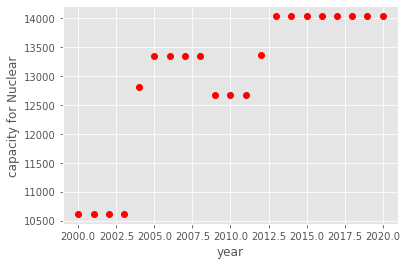

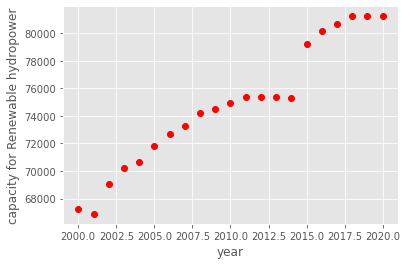

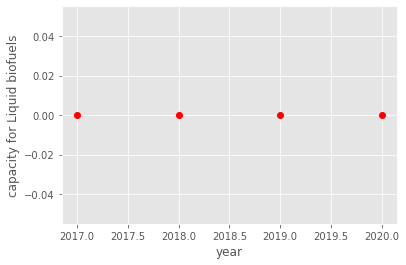

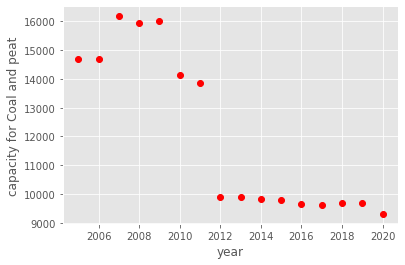

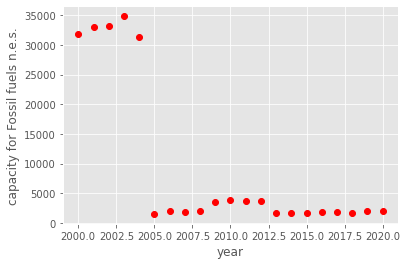

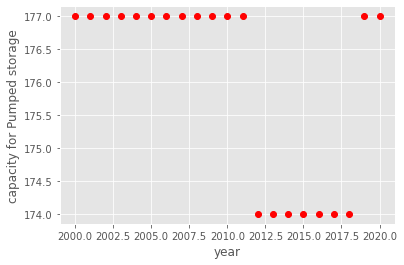

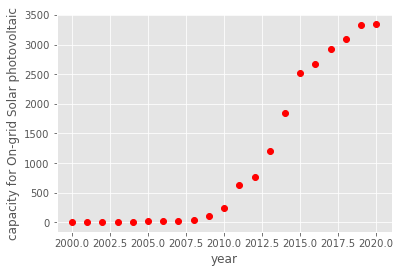

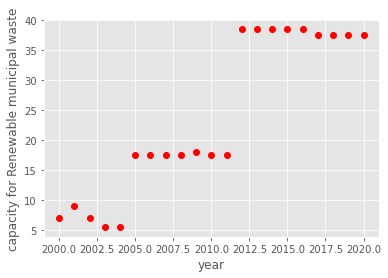

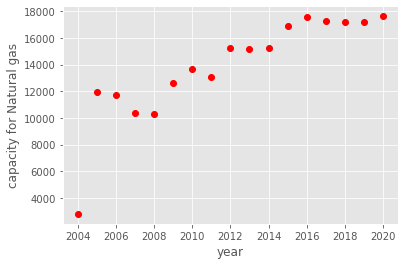

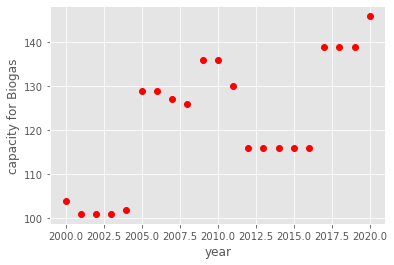

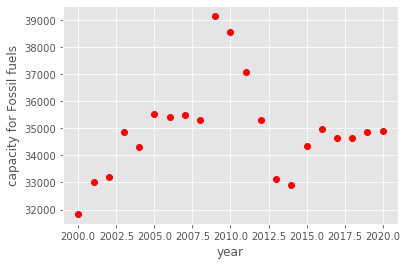

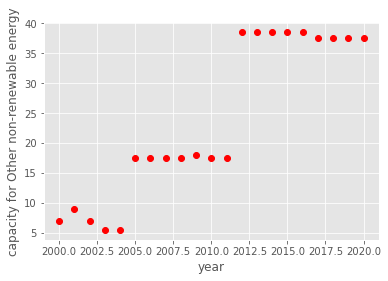

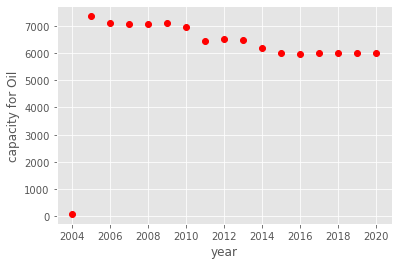

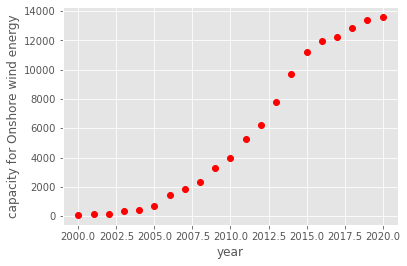

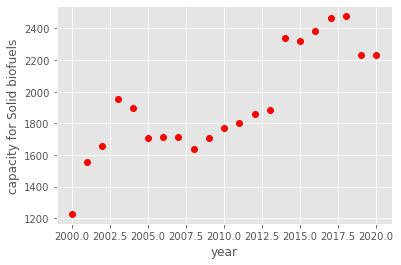

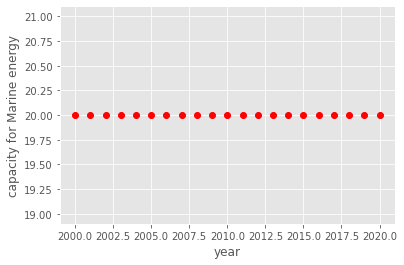

In [65]:
for tc in tech_col:
    for y in range(2000, 2021):
        if y in capacity_dict[tc]:
            #print(capacity_dict[tc][y])
            plt.plot(y, capacity_dict[tc][y], 'ro')
            
    plt.xlabel('year')
    plt.ylabel('capacity for '+tc)
    plt.show()

14854.855429497547
15022.982171798998
15191.108914100507
15359.235656401957
15527.362398703408
15695.489141004859
15863.61588330631
16031.74262560776
16199.86936790921
16367.99611021066
16536.12285251217
16704.24959481362
16872.37633711507
17040.50307941652
17208.629821717972
17376.756564019423
17544.883306320873
17713.010048622382
17881.136790923832
18049.263533225283
82756.30976579757
83483.380910296
84210.45205479441
84937.52319929283
85664.59434379148
86391.6654882899
87118.73663278832
87845.80777728674
88572.87892178516
89299.95006628358
90027.02121078223
90754.09235528065
91481.16349977907
92208.23464427749
92935.3057887759
93662.37693327432
94389.44807777274
95116.5192222714
95843.59036676981
96570.66151126823
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6717.27536231908
6096.449275362538
5475.623188405996
4854.797101449454
4233.971014492912
3613.1449275363702
2992.3188405798282
2371.4927536232863
1750.6666666667443
1129.8405797102023
509.01449

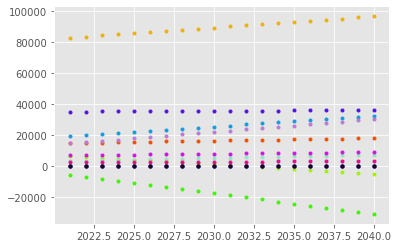

In [106]:
rgbs = ['#f54e07', '#f5ae07', '#f5f507', '#9ef507',
        '#3ff507', '#2e823a', '#90e8c5', '#12d4e6',
        '#129ce6', '#1247e6', '#5212e6', '#8e12e6',
        '#d412e6', '#bc7ad6', '#e30b90', '#1c0212']

index = 0

for tc in tech_col:
    x = []
    y = []
    for year in range(2000, 2021):
        if year in capacity_dict[tc]:
            x.append(year)
            y.append(capacity_dict[tc][year])
    lr = LinearRegression()
    x = np.array(x)
    y = np.array(y)
    #print(type(x))
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2)
    lr.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
    #score = lr.score(x_test.reshape(-1,1), y_test.reshape(-1,1))
    #print(score)
    
    for year in range(2021, 2041):
        pred = lr.predict(np.array([year]).reshape(-1,1))
        print(pred[0][0])

        plt.plot(year, 
                 pred,
                 rgbs[index], linestyle='-', marker='.')
    
    index += 1
        
plt.show()